# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

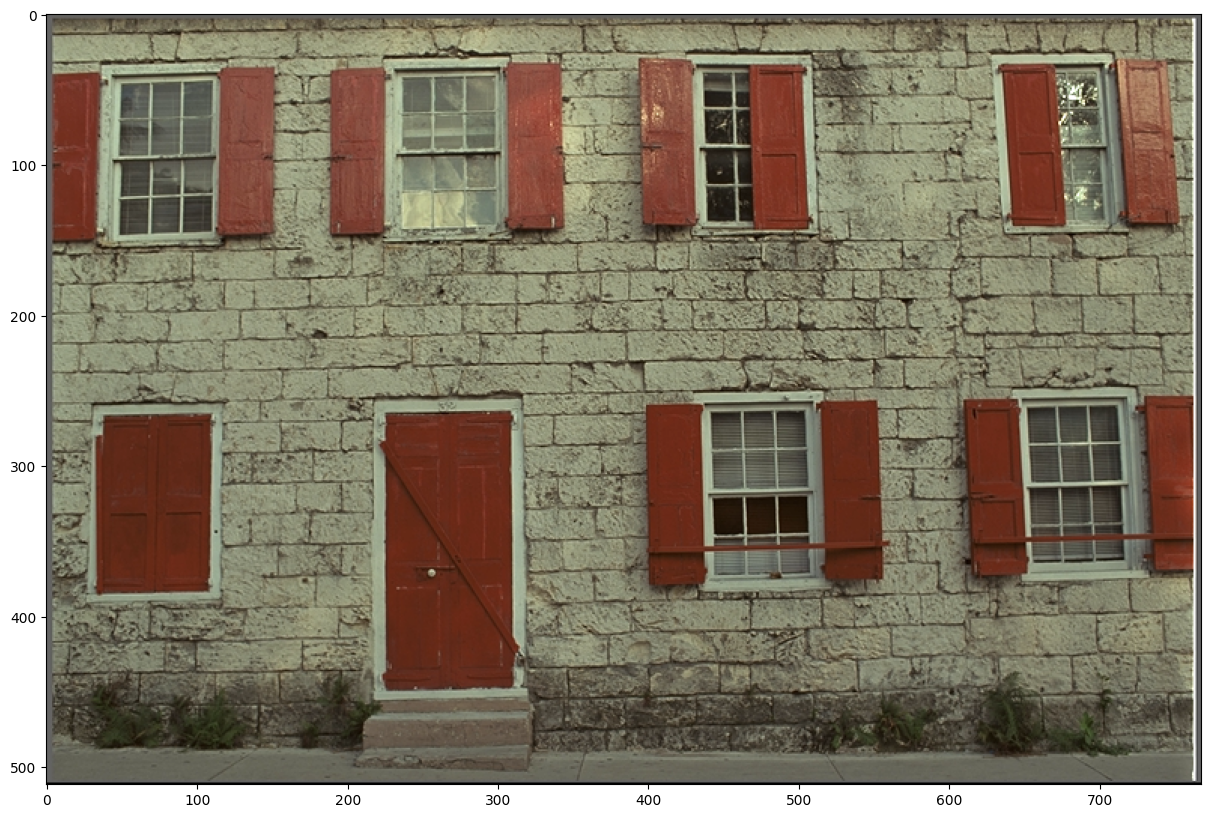

In [2]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

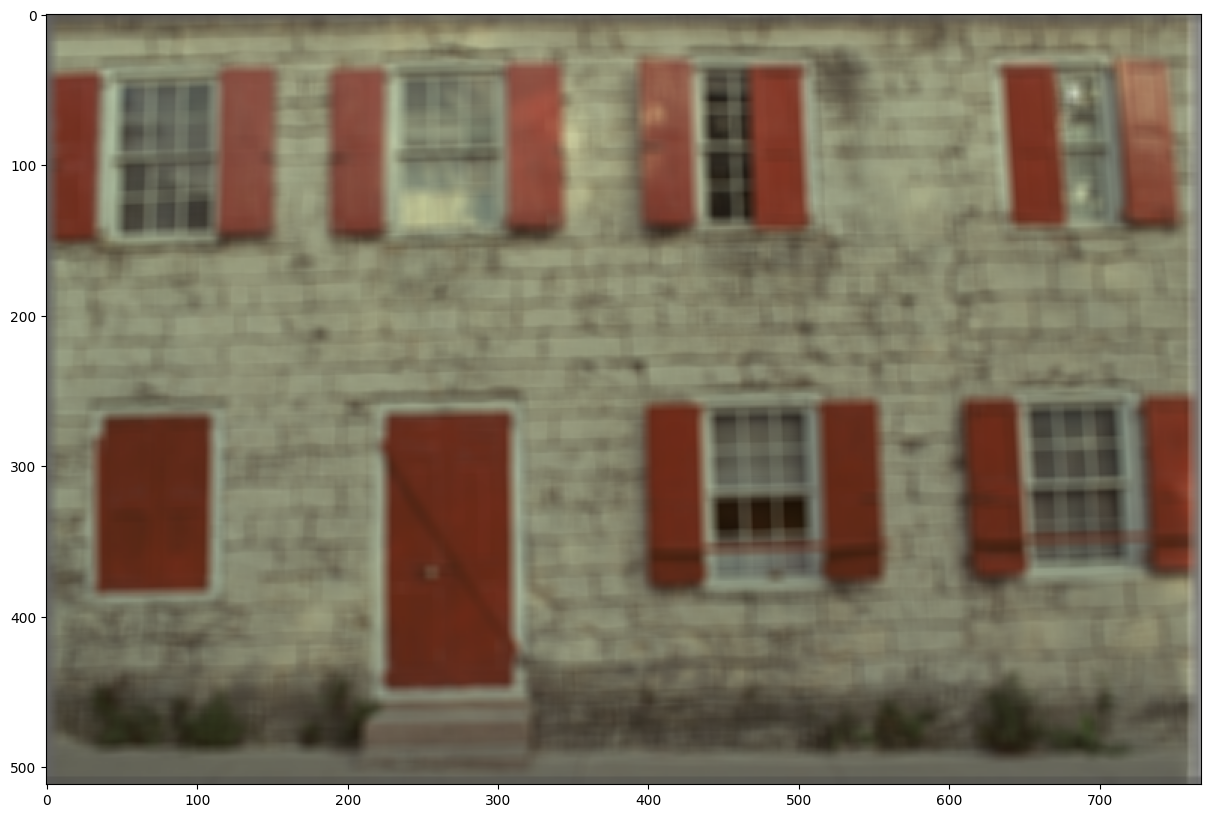

In [55]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)

unsharp = cv2.GaussianBlur(img, (9, 9), 15)
plt.imshow(unsharp)

In [60]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

diff = img.astype(np.float32) - unsharp.astype(np.float32)
# plt.imshow(diff.astype(np.uint8))

(-0.5, 767.5, 2047.5, -0.5)

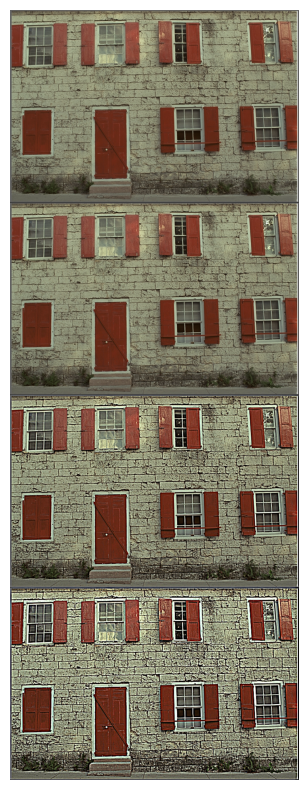

In [57]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

sharpened = np.clip(img.astype(np.float32) + diff * 0.1, 0, 255)
sharpened2 = np.clip(img.astype(np.float32) + diff * 1.3, 0, 255)
sharpened3 = np.clip(img.astype(np.float32) + diff * 3, 0, 255)

out = np.vstack([img, sharpened.astype(np.uint8), sharpened2.astype(np.uint8), sharpened3.astype(np.uint8)])
plt.imshow(out)
plt.axis(False)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

Из того что попробовал и погуглил оптимальный это 0.5 до 1.5. Все очень субьективно и зависит как от входных данных так и от резульата который мы ожидаем.
Если мы укажем сильно низкий, то мы не получим никакого эффекта. Изображение будт максимально приближено к оригиналу.
Если укажем сильн высокий то получим очень "резкое" изобрадение и выдиление каких-то элементов картинки которые не значительны для нас (мелкие). Например светлые пиксели (скопление пискселей) станут светлее (белыми) и получается как засвет который вряд ли нам нужен был, серые соответсвенно темнее или черными. Выделяются явные трещины на кирпичах, это, скорее всего, не тот эффект который мы ожидали (если у нас задача не стоит искать трещины в стенке). И, скорее всего, если бы на фото было много шумов, то мы их только бы усилили. Опять таки все зависит от задачи :) если бы была задача посчитать сколько окон на фото, то высокий amount в этом конкретном примере скорее всего помог бы, так как рама окна становиться "контрастной" на фото. 
Так же зависит и от размытия который мы применили на этапе unsharp, если применить большое (как я сделал), то у нас помимо того что границы виделяются, так и "заполнение" внутри страновится явным, если небольшое, то границы в явных местах становится более четкими, но в местах где разница цвета небольшая они не проявляются (пример: досточки/элементы внутри двери). все происходит из-за того что diff между оригиналом и размытым становится более явным.